In [12]:
import tensorflow as tf
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import sklearn

In [13]:
model = tf.keras.models.load_model('model_128.hdf5')

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_178_input (InputLayer [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d_178 (Conv2D)          (None, 128, 128, 16)      1216      
_________________________________________________________________
conv2d_179 (Conv2D)          (None, 128, 128, 16)      6416      
_________________________________________________________________
batch_normalization_149 (Bat (None, 128, 128, 16)      64        
_________________________________________________________________
max_pooling2d_89 (MaxPooling (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_180 (Conv2D)          (None, 64, 64, 24)        9624      
_________________________________________________________________
conv2d_181 (Conv2D)          (None, 64, 64, 24)        1442

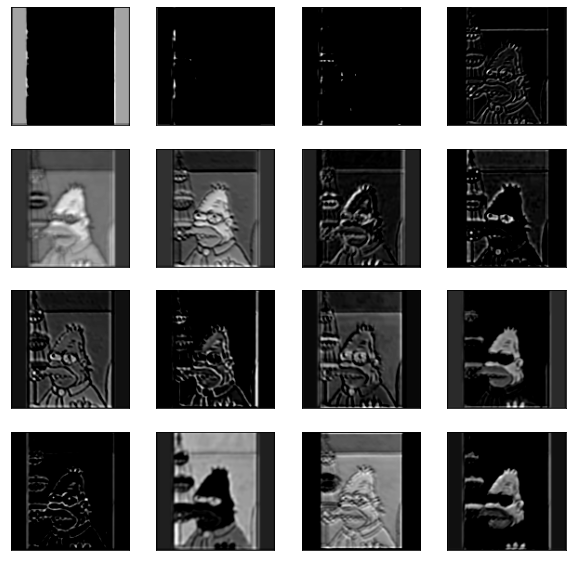

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


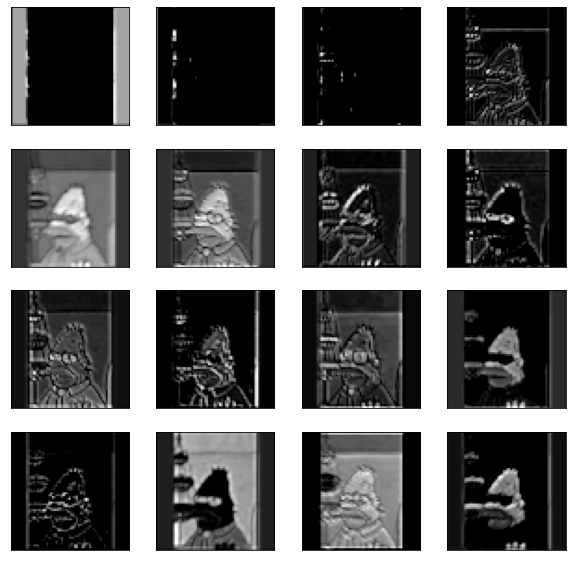

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


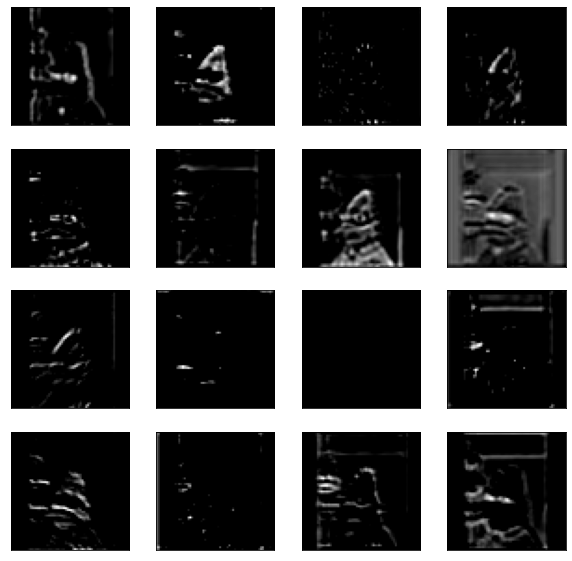

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


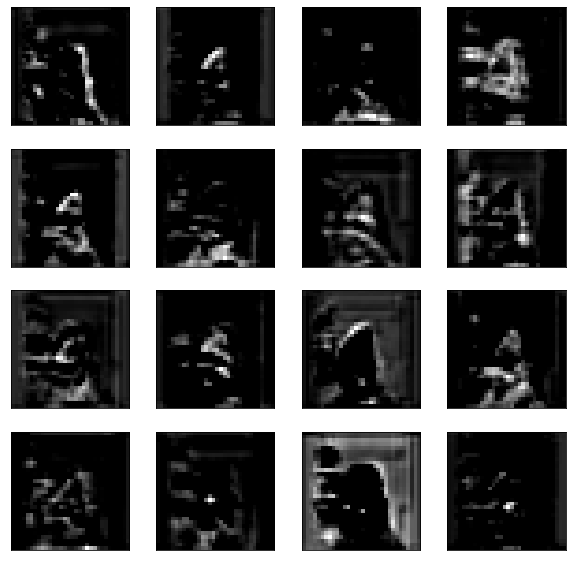

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


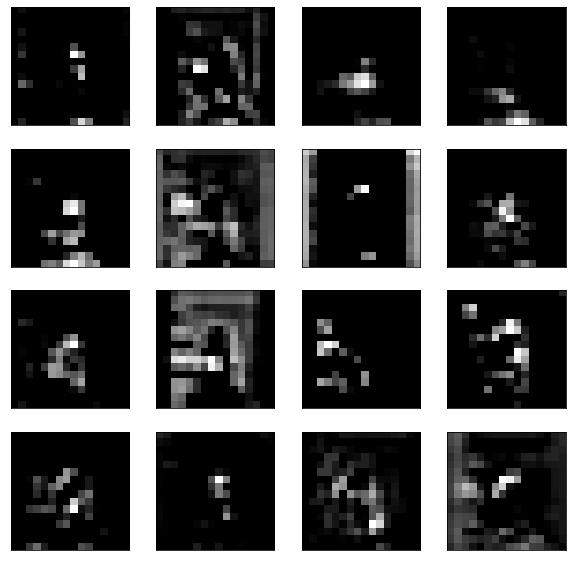

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


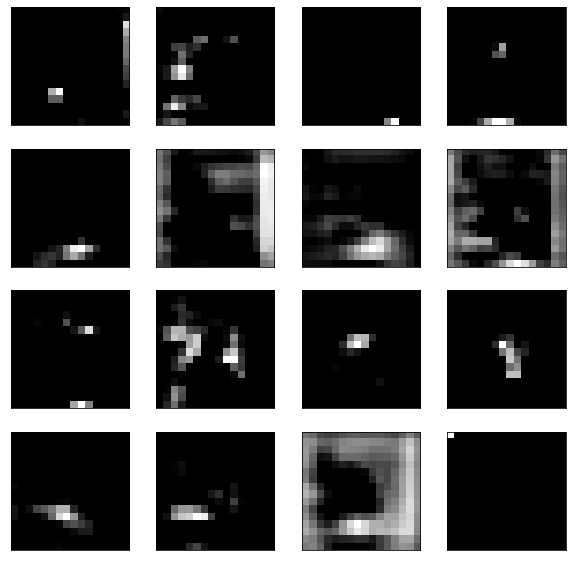

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


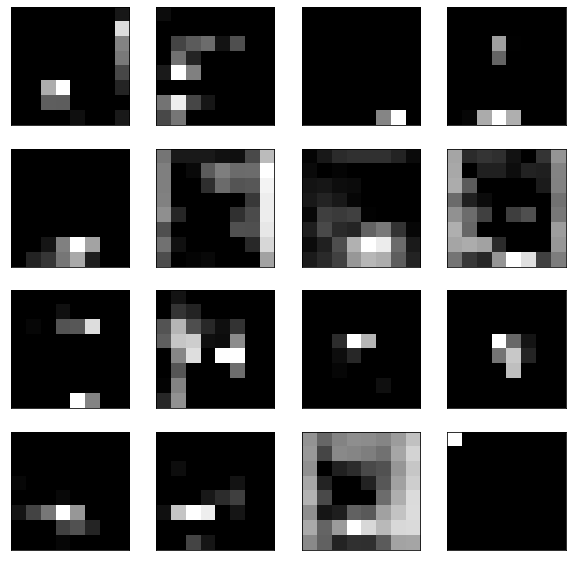

In [11]:
#### Now plot filter outputs    
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model
#Define a new truncated model to only include the conv layers of interest
#conv_layer_index = [1, 3, 6, 8, 11, 13, 15]
conv_layer_index = [1, 3, 6,8,11,13,15]  #TO define a shorter model

outputs = [model.layers[i].output for i in conv_layer_index]
model_short = Model(inputs=model.inputs, outputs=outputs)
print(model_short.summary())

#Input shape to the model is 64 x 64. SO resize input image to this shape.

pic_size=128

#loading a image you want
temp = cv2.imread('./theSimpsons-train/train/abraham_grampa_simpson/ENQ_abraham_grampa_simpson_0.jpg')
temp = cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)
temp = cv2.resize(temp, (pic_size,pic_size)).astype('float32') / 255.

# expand dimensions to match the shape of model input
temp = np.expand_dims(temp, axis=0)

# Generate feature output by predicting on the input image
feature_output = model_short.predict(temp)

columns = 4
rows = 4
for ftr in feature_output:
    #pos = 1
    fig=plt.figure(figsize=(10, 10))
    for i in range(1, columns*rows +1):
        fig =plt.subplot(rows, columns, i)
        fig.set_xticks([])  #Turn off axis
        fig.set_yticks([])
        plt.imshow(ftr[0, :, :, i-1], cmap='gray')
        #pos += 1
        print(1)
    plt.show()

In [15]:
pip freeze


Note: you may need to restart the kernel to use updated packages.
absl-py==0.15.0
aiohttp @ file:///D:/bld/aiohttp_1623682503714/work
alabaster==0.7.12
argh @ file:///home/conda/feedstock_root/build_artifacts/argh_1595627874344/work
argon2-cffi @ file:///D:/bld/argon2-cffi_1633990609293/work
arrow @ file:///home/conda/feedstock_root/build_artifacts/arrow_1635261338479/work
astor @ file:///home/conda/feedstock_root/build_artifacts/astor_1593610464257/work
astroid==2.3.3
astunparse==1.6.3
async-generator==1.10
async-timeout==3.0.1
atomicwrites @ file:///home/conda/feedstock_root/build_artifacts/atomicwrites_1588182545583/work
attrs @ file:///home/conda/feedstock_root/build_artifacts/attrs_1620387926260/work
autopep8 @ file:///home/conda/feedstock_root/build_artifacts/autopep8_1635070149841/work
Babel @ file:///home/conda/feedstock_root/build_artifacts/babel_1619719576210/work
backcall @ file:///home/conda/feedstock_root/build_artifacts/backcall_1592338393461/work
backports.functools-lru-